# test_cgle.ipynb

### Install

In [ ]:
pip install git+https://github.com/grmacchio/dynml.git

### Imports, Random Seeds, and Data Type Settings

In [2]:
from random import seed

from torch import abs, arange, float64, linspace, set_default_dtype
from torch.linalg import norm
from torch.random import manual_seed as torch_manual_seed
from torch.cuda.random import manual_seed as cuda_manual_seed
from matplotlib.pyplot import subplots, show
from numpy import round

from dynml.examples.cgle import CGLE
from dynml.dyn.cont.ode.firstorder.discretize import gen_approx_discrete_sys
from dynml.dyn.discrete.numsolve import gen_num_trajs

In [3]:
seed(0)                                                                         # set the random seed
torch_manual_seed(0)                                                            # set the torch random seed
cuda_manual_seed(0)                                                             # set the cuda random seed

In [4]:
set_default_dtype(float64)                                                      # set the default data type

### Examine Trajectories with Single Limit Cycle Behavior

In [5]:
K = 256                                                                         # set the number of Fourier modes
L = 10.0                                                                        # set the domain size
alpha_r = 1.0                                                                   # set the real part of the alpha parameter
alpha_i = 0.0                                                                   # set the imaginary part of the alpha parameter
beta_r = 1.0                                                                    # set the real part of the beta parameter
beta_i = 1.0                                                                    # set the imaginary part of the beta parameter
gamma_r = -1.0                                                                  # set the real part of the gamma parameter
gamma_i = -2.0                                                                  # set the imaginary part of the gamma parameter
fos = CGLE(K, L, alpha_r, alpha_i, beta_r, beta_i, gamma_r, gamma_i)            # create the CGLE first-order system
dt = 0.01                                                                       # set the time step
method = 'rk3cn'                                                                # set the numerical method
imp_sol = 'lu'                                                                  # set the implicit solver
ds = gen_approx_discrete_sys(fos, dt, method, imp_sol)                          # generate the discrete system
num_trajs = 4                                                                   # set the number of trajectories
t_final = 100.0                                                                 # set the final time
num_samples = int(t_final / dt) + 1                                             # set the number of time samples
traj = gen_num_trajs(ds, fos.gen_ic, num_trajs, num_samples, compute='cpu',     # generate the numerical trajectories
                     output='cpu', pbar=True)

100%|██████████| 10000/10000 [01:10<00:00, 142.72it/s]


In [6]:
norms = norm(traj, dim=-1)                                                      # compute the norms of the trajectories

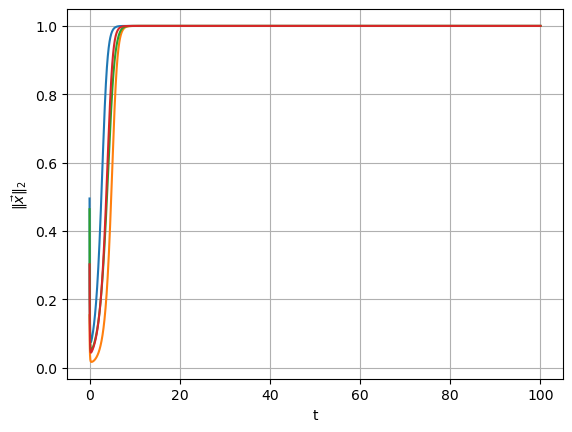

In [7]:
fig, ax = subplots()                                                            # generate a figure and axis
t = linspace(0, t_final, num_samples)                                           # generate the time vector
for i in range(num_trajs):                                                      # iterate over the trajectories
    ax.plot(t, norms[i])                                                        # plot the norms of the trajectories
ax.grid()                                                                       # add a grid to the plot
ax.set_xlabel('t')                                                              # set the x-axis label
ax.set_ylabel('$\\|\\vec{x}\\|_2$')                                             # set the y-axis label
show()                                                                          # display the plot

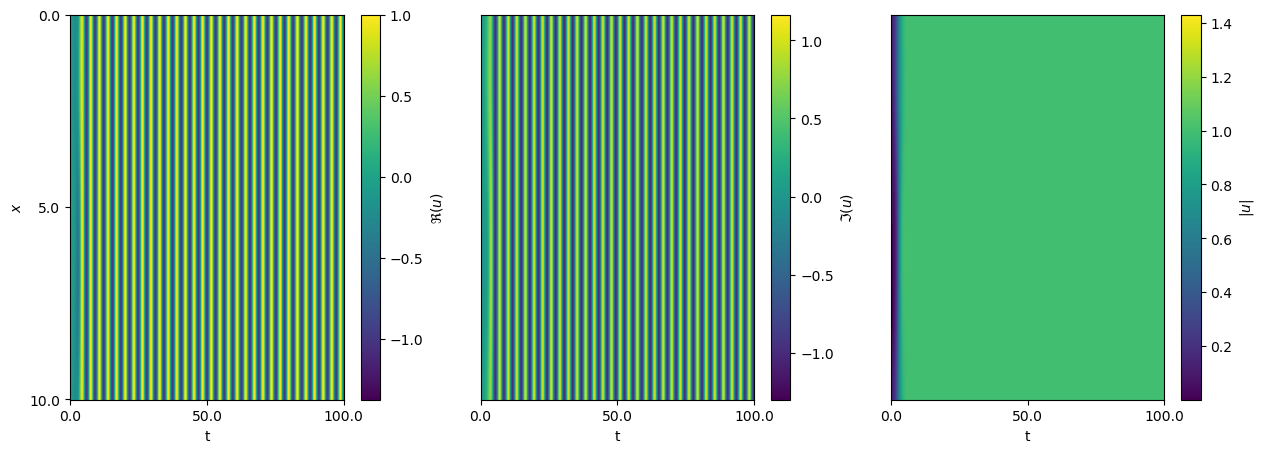

In [8]:
dt_plot = 50.0                                                                  # set the time step for the x-axis ticks
dx = L / (2 * K)                                                                # set the space step
dx_plot = K * dx                                                                # set the space step for the y-axis ticks
fig, ax = subplots(1, 3, figsize=(15, 5))                                       # generate a figure and axis
q = fos.state_to_phys(traj)                                                     # convert the trajectories to physical space
x = linspace(0, L, fos.N)                                                       # generate the x vector
im0 = ax[0].imshow(q[0, :, :].real.T, aspect='auto')                            # plot the real part of the trajectories
ax[0].set_ylabel('$x$')                                                         # set the y-axis label
ax[0].set_xlabel('t')                                                           # set the x-axis label
ax[0].set_yticks(arange(0, 2 * K + 1, int(dx_plot/dx)).numpy())                 # set the y-axis tick positions
ax[0].set_yticklabels(round(x[::int(dx_plot/dx)].numpy(), 2))                   # set the y-axis tick labels
ax[0].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[0].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar0 = fig.colorbar(im0, ax=ax[0])                                             # add a colorbar to the plot
cbar0.set_label('$\\Re(u)$')                                                    # set the colorbar label
im1 = ax[1].imshow(q[0, :, :].imag.T, aspect='auto')                            # plot the imaginary part of the trajectories
ax[1].set_xlabel('t')                                                           # set the x-axis label
ax[1].set_yticks([])                                                            # remove the y-ticks
ax[1].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[1].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar1 = fig.colorbar(im1, ax=ax[1])                                             # add a colorbar to the plot
cbar1.set_label('$\\Im(u)$')                                                    # set the colorbar label
im2 = ax[2].imshow(abs(q[0, :, :]).T, aspect='auto')                            # plot the absolute value of the trajectories
ax[2].set_xlabel('t')                                                           # set the x-axis label
ax[2].set_yticks([])                                                            # remove the y-ticks
ax[2].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[2].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar2 = fig.colorbar(im2, ax=ax[2])                                             # add a colorbar to the plot
cbar2.set_label('$|u|$')                                                        # set the colorbar label
show()                                                                          # display the plots

### Examine Trajectories with Multiple Limit Cycle Behavior

In [9]:
K = 256                                                                         # set the number of Fourier modes
L = 100.0                                                                       # set the domain size
alpha_r = 1.0                                                                   # set the real part of the alpha parameter
alpha_i = 0.0                                                                   # set the imaginary part of the alpha parameter
beta_r = 1.0                                                                    # set the real part of the beta parameter
beta_i = 1.0                                                                    # set the imaginary part of the beta parameter
gamma_r = -1.0                                                                  # set the real part of the gamma parameter
gamma_i = -2.0                                                                  # set the imaginary part of the gamma parameter
fos = CGLE(K, L, alpha_r, alpha_i, beta_r, beta_i, gamma_r, gamma_i)            # create the CGLE first-order system
dt = 0.01                                                                       # set the time step
method = 'rk3cn'                                                                # set the numerical method
imp_sol = 'lu'                                                                  # set the implicit solver
ds = gen_approx_discrete_sys(fos, dt, method, imp_sol)                          # generate the discrete system
num_trajs = 4                                                                   # set the number of trajectories
t_final = 100.0                                                                 # set the final time
num_samples = int(t_final / dt) + 1                                             # set the number of time samples
traj = gen_num_trajs(ds, fos.gen_ic, num_trajs, num_samples, compute='cpu',     # generate the numerical trajectories
                     output='cpu', pbar=True)

100%|██████████| 10000/10000 [01:13<00:00, 135.28it/s]


In [10]:
norms = norm(traj, dim=-1)                                                      # compute the norms of the trajectories

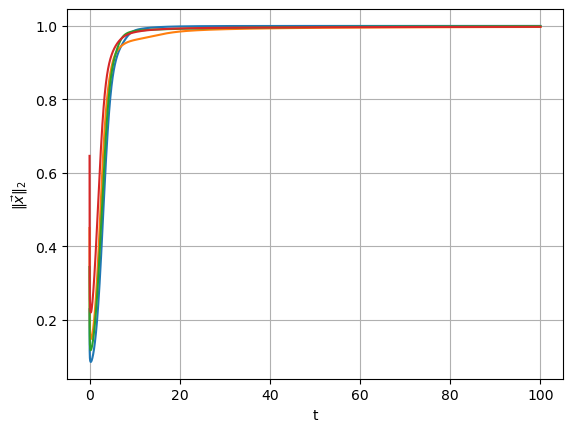

In [11]:
fig, ax = subplots()                                                            # generate a figure and axis
t = linspace(0, t_final, num_samples)                                           # generate the time vector
for i in range(num_trajs):                                                      # iterate over the trajectories
    ax.plot(t, norms[i])                                                        # plot the norms of the trajectories
ax.grid()                                                                       # add a grid to the plot
ax.set_xlabel('t')                                                              # set the x-axis label
ax.set_ylabel('$\\|\\vec{x}\\|_2$')                                             # set the y-axis label
show()                                                                          # display the plot

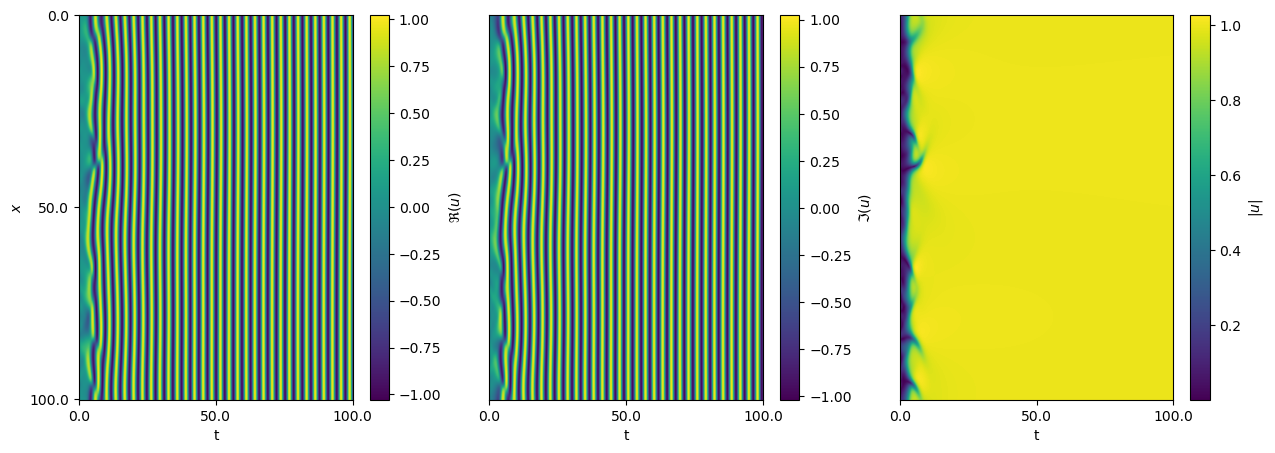

In [12]:
dt_plot = 50.0                                                                  # set the time step for the x-axis ticks
dx = L / (2 * K)                                                                # set the space step
dx_plot = K * dx                                                                # set the space step for the y-axis ticks
fig, ax = subplots(1, 3, figsize=(15, 5))                                       # generate a figure and axis
q = fos.state_to_phys(traj)                                                     # convert the trajectories to physical space
x = linspace(0, L, fos.N)                                                       # generate the x vector
im0 = ax[0].imshow(q[0, :, :].real.T, aspect='auto')                            # plot the real part of the trajectories
ax[0].set_ylabel('$x$')                                                         # set the y-axis label
ax[0].set_xlabel('t')                                                           # set the x-axis label
ax[0].set_yticks(arange(0, 2 * K + 1, int(dx_plot/dx)).numpy())                 # set the y-axis tick positions
ax[0].set_yticklabels(round(x[::int(dx_plot/dx)].numpy(), 2))                   # set the y-axis tick labels
ax[0].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[0].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar0 = fig.colorbar(im0, ax=ax[0])                                             # add a colorbar to the plot
cbar0.set_label('$\\Re(u)$')                                                    # set the colorbar label
im1 = ax[1].imshow(q[0, :, :].imag.T, aspect='auto')                            # plot the imaginary part of the trajectories
ax[1].set_xlabel('t')                                                           # set the x-axis label
ax[1].set_yticks([])                                                            # remove the y-ticks
ax[1].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[1].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar1 = fig.colorbar(im1, ax=ax[1])                                             # add a colorbar to the plot
cbar1.set_label('$\\Im(u)$')                                                    # set the colorbar label
im2 = ax[2].imshow(abs(q[0, :, :]).T, aspect='auto')                            # plot the absolute value of the trajectories
ax[2].set_xlabel('t')                                                           # set the x-axis label
ax[2].set_yticks([])                                                            # remove the y-ticks
ax[2].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[2].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar2 = fig.colorbar(im2, ax=ax[2])                                             # add a colorbar to the plot
cbar2.set_label('$|u|$')                                                        # set the colorbar label
show()                                                                          # display the plots

### Examine Trajectories with Chaotic Behavior

In [13]:
K = 256                                                                         # set the number of Fourier modes
L = 200.0                                                                       # set the domain size
alpha_r = 1.0                                                                   # set the real part of the alpha parameter
alpha_i = 0.0                                                                   # set the imaginary part of the alpha parameter
beta_r = 1.0                                                                    # set the real part of the beta parameter
beta_i = 2.0                                                                    # set the imaginary part of the beta parameter
gamma_r = -1.0                                                                  # set the real part of the gamma parameter
gamma_i = 2.0                                                                   # set the imaginary part of the gamma parameter
fos = CGLE(K, L, alpha_r, alpha_i, beta_r, beta_i, gamma_r, gamma_i)            # create the CGLE first-order system
dt = 0.01                                                                       # set the time step
method = 'rk3cn'                                                                # set the numerical method
imp_sol = 'lu'                                                                  # set the implicit solver
ds = gen_approx_discrete_sys(fos, dt, method, imp_sol)                          # generate the discrete system
num_trajs = 4                                                                   # set the number of trajectories
t_final = 100.0                                                                 # set the final time
num_samples = int(t_final / dt) + 1                                             # set the number of time samples
traj = gen_num_trajs(ds, fos.gen_ic, num_trajs, num_samples, compute='cpu',     # generate the numerical trajectories
                     output='cpu', pbar=True)

100%|██████████| 10000/10000 [01:03<00:00, 156.47it/s]


In [14]:
norms = norm(traj, dim=-1)                                                      # compute the norms of the trajectories

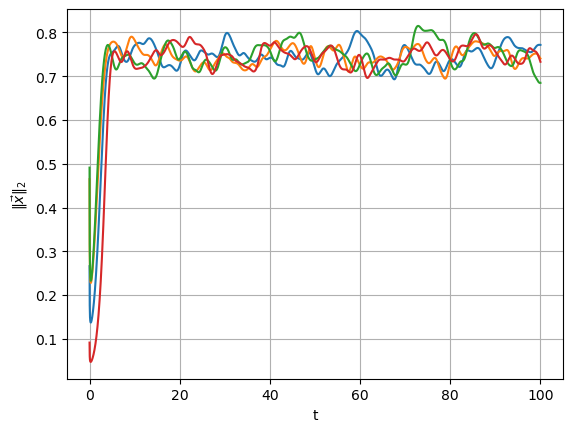

In [15]:
fig, ax = subplots()                                                            # generate a figure and axis
t = linspace(0, t_final, num_samples)                                           # generate the time vector
for i in range(num_trajs):                                                      # iterate over the trajectories
    ax.plot(t, norms[i])                                                        # plot the norms of the trajectories
ax.grid()                                                                       # add a grid to the plot
ax.set_xlabel('t')                                                              # set the x-axis label
ax.set_ylabel('$\\|\\vec{x}\\|_2$')                                             # set the y-axis label
show()                                                                          # display the plot

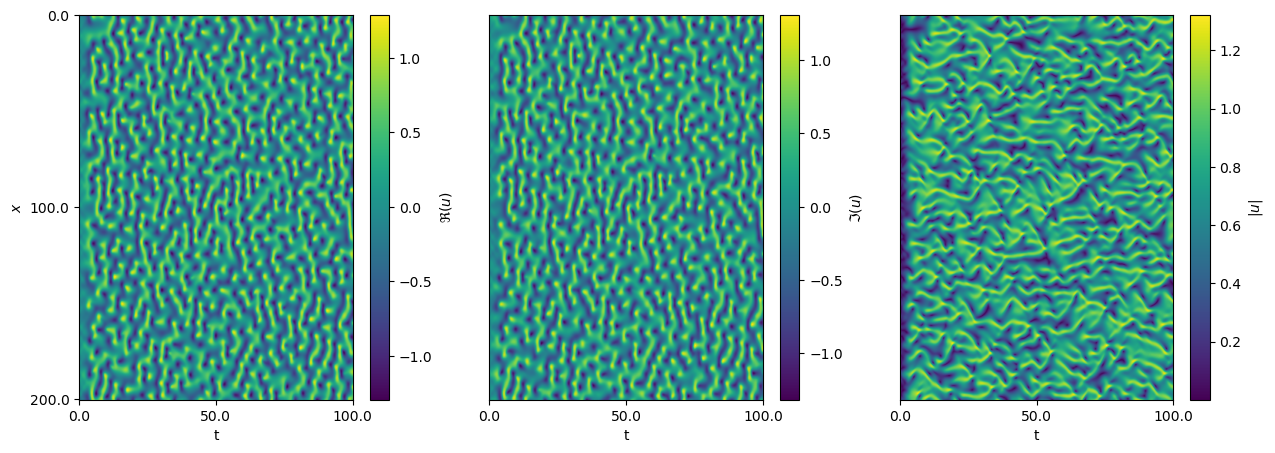

In [16]:
dt_plot = 50.0                                                                  # set the time step for the x-axis ticks
dx = L / (2 * K)                                                                # set the space step
dx_plot = K * dx                                                                # set the space step for the y-axis ticks
fig, ax = subplots(1, 3, figsize=(15, 5))                                       # generate a figure and axis
q = fos.state_to_phys(traj)                                                     # convert the trajectories to physical space
x = linspace(0, L, fos.N)                                                       # generate the x vector
im0 = ax[0].imshow(q[0, :, :].real.T, aspect='auto')                            # plot the real part of the trajectories
ax[0].set_ylabel('$x$')                                                         # set the y-axis label
ax[0].set_xlabel('t')                                                           # set the x-axis label
ax[0].set_yticks(arange(0, 2 * K + 1, int(dx_plot/dx)).numpy())                 # set the y-axis tick positions
ax[0].set_yticklabels(round(x[::int(dx_plot/dx)].numpy(), 2))                   # set the y-axis tick labels
ax[0].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[0].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar0 = fig.colorbar(im0, ax=ax[0])                                             # add a colorbar to the plot
cbar0.set_label('$\\Re(u)$')                                                    # set the colorbar label
im1 = ax[1].imshow(q[0, :, :].imag.T, aspect='auto')                            # plot the imaginary part of the trajectories
ax[1].set_xlabel('t')                                                           # set the x-axis label
ax[1].set_yticks([])                                                            # remove the y-ticks
ax[1].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[1].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar1 = fig.colorbar(im1, ax=ax[1])                                             # add a colorbar to the plot
cbar1.set_label('$\\Im(u)$')                                                    # set the colorbar label
im2 = ax[2].imshow(abs(q[0, :, :]).T, aspect='auto')                            # plot the absolute value of the trajectories
ax[2].set_xlabel('t')                                                           # set the x-axis label
ax[2].set_yticks([])                                                            # remove the y-ticks
ax[2].set_xticks(arange(0, num_samples, int(dt_plot/dt)).numpy())               # set the x-axis tick positions
ax[2].set_xticklabels(t[::int(dt_plot/dt)].numpy())                             # set the x-axis tick labels
cbar2 = fig.colorbar(im2, ax=ax[2])                                             # add a colorbar to the plot
cbar2.set_label('$|u|$')                                                        # set the colorbar label
show()                                                                          # display the plots